In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
'''
col = pd.read_excel("./Ing_No_행.xlsx")
col = col.drop(['Unnamed: 0'], axis=1)
col_names = col.iloc[0]
#print(col_names)
'''

dataset_tr = pd.read_excel('./train_data.xlsx')
dataset_tr = dataset_tr.drop(['user','Unnamed: 0', 'cuisineid'],axis=1)
#print(dataset_tr)

dataset_te = pd.read_excel('./test_01.xlsx')
dataset_te = dataset_te.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)
#dataset_te = dataset_te.rename(columns={'Unnamed: 0':'testid'})

dataset_tr

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,cuisine
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,cream pasta1
1,0,1,1,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,cream pasta2
2,1,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,cream pasta3
3,0,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,cream pasta4
4,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tomato pasta1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,bibim naengmyeon4
176,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cucumber sobak1
177,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cucumber sobak2
178,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,cucumber sobak3


In [49]:
# DataFrame 확인
#print(dataset_tr.shape) # (row개수, column개수)
#print(dataset_tr.info()) # 데이터 타입, row 개수, column 개수, 컬럼 데이터 타입
print(dataset_tr.describe()) # 요약 통계 정보
#print(dataset_tr.head())
#print(dataset_tr.iloc[0:4]) # dataset.head() 앞
#print(dataset_tr.iloc[-4:]) # dataset.tail() 뒤

              0           1           2           3           4           5    \
count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000   
mean     0.033333    0.044444    0.461111    0.077778    0.227778    0.383333   
std      0.180006    0.206655    0.499876    0.268569    0.420568    0.487555   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    0.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              6           7           8           9    ...         240  \
count  180.000000  180.000000  180.000000  180.000000  ...  180.000000   
mean     0.022222    0.011111    0.200000    0.011111  ...    0.005556   
std      0.147817    0.105114    0.401116    0.1

In [50]:
# 데이터 전처리:
# 데이터 세트를 데이터(포인트)와 레이블로 구분
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X_train = dataset_tr.iloc[:,:-1].to_numpy() # DataFrame을 np.ndarray로 변환
X_test = dataset_te.iloc[:,:-1].to_numpy()
#print(X_train,X_test)
# y = 전체 행, 마지막 열 데이터
y_train = dataset_tr.iloc[:, -1].to_numpy()
y_test = dataset_te.iloc[:, -1].to_numpy()
print(y_train)
print(y_test)
# 전체 데이터 세트를 학습 세트(training set)와 검증 세트(test set)로 나눔
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(len(X_train), len(y_test))
#print(X_train[:3])
#print(y_train[:3])

['cream pasta1' 'cream pasta2' 'cream pasta3' 'cream pasta4'
 'tomato pasta1' 'tomato pasta2' 'tomato pasta3' 'tomato pasta4'
 'Gochujang Tteokbokki1' 'Gochujang Tteokbokki2' 'Gochujang Tteokbokki3'
 'Gochujang tteokbokki4' 'jajang tteokbokki1' 'jajang tteokbokki2'
 'jajang tteokbokki3' 'jajang tteokbokki4' 'braised spicy chicken1'
 'braised spicy chicken2' 'braised spicy chicken3'
 'braised spicy chicken4' 'kimchi stew1' 'kimchi stew2' 'kimchi stew3'
 'kimchi stew4' 'doenjang stew1' 'doenjang stew2' 'doenjang stew3'
 'doenjang stew4' 'stir-fried spicy pork1' 'stir-fried spicy pork2'
 'stir-fried spicy pork3' 'stir-fried spicy pork4' 'Kimchi fried rice1'
 'Kimchi fried rice2' 'Kimchi fried rice3' 'Kimchi fried rice4'
 'Egg fried rice1' 'Egg fried rice2' 'Egg fried rice3' 'Egg fried rice4'
 'Fried chicken1' 'Fried chicken2' 'Fried chicken3' 'Fried chicken4'
 'Seasoned chicken1' 'Seasoned chicken2' 'Seasoned chicken3'
 'Seasoned chicken4' 'tteok soup1' 'tteok soup2' 'tteok soup3'
 'tteok

In [51]:
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화)
# Z-score 표준화: 평균을 0, 표준편차 1로 변환
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) # 스케일링(표준화)를 위한 평균과 표준 편차 계산
X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
X_test = scaler.transform(X_test)

# 스케일링(z-score 표준화 수행 결과 확인)
for col in range(4):
    print(f'평균 = {X_train[:, col].mean()}, 표준편차= {X_train[:, col].std()}')
for col in range(4):
    print(f'평균 = {X_test[:, col].mean()}, 표준편차= {X_test[:, col].std()}')

평균 = 6.41462192005646e-17, 표준편차= 1.0000000000000004
평균 = 9.868649107779169e-17, 표준편차= 1.0000000000000002
평균 = -2.4671622769447922e-17, 표준편차= 1.0
평균 = -5.921189464667501e-17, 표준편차= 1.0
평균 = -0.1856953381770519, 표준편차= 2.7755575615628914e-17
평균 = -0.10783277320343837, 표준편차= 0.7152816976385908
평균 = -0.07801410431448318, 표준편차= 0.9908286423918248
평균 = -0.12446097204675334, 표준편차= 0.7694690482267639


In [59]:
# 4. 학습/예측(Training/Pradiction)
# k-NN 분류기를 생성
classifier = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
classifier.fit(X_train, y_train)
# 예측
y_pred = classifier.predict(X_test)
#print(y_pred)
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv('./y_pred.csv')

# 5. 모델 평가
conf_matrix = confusion_matrix(y_test, y_pred) # 오차행렬

print(conf_matrix)

report = classification_report(y_test, y_pred)
print(report)

# 정확도(accuracy) = (전체 정답 수) / (전체 문제 수)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                              precision    recall  f1-score   support

                     gimbap        0.00      0.00      0.00       1.0
              Egg fried rice       0.00      0.00      0.00       1.0
             Egg fried rice1       0.00      0.00      0.00       0.0
             Egg fried rice4       0.00      0.00      0.00       0.0
               Fried chicken       0.00      0.00      0.00       1.0
              Fried chicken1       0.00      0.00      0.00       0.0
        Gochujang Tteokbokki       0.00      0.00      0.00       1.0
       Gochujang Tteokbokki2       0.00      0.00      0.00       0.0
       Gochujang tteokbokki4       0.00      0.00      0.00       0.0
                     Japchae       0.00      0.00      0.00       1.0
           Kimchi Fried Rice       0.00      0.00      0.00       1.0
          Kimchi fried rice3       0.00

C:\Users\202021012\Anaconda3\envs\food21\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\202021012\Anaconda3\envs\food21\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\202021012\Anaconda3\envs\food21\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\202021

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


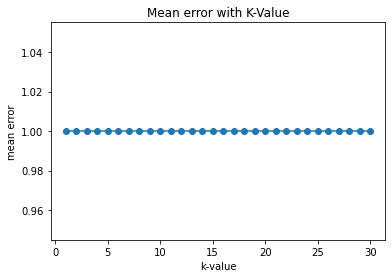

In [60]:
# 6. 모델 개선 - k값을 변화시킬 때, 에러가 줄어드는 지
errors = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))
print(errors)

plt.plot(range(1, 31), errors, marker='o')
plt.title('Mean error with K-Value')
plt.xlabel('k-value')
plt.ylabel('mean error')
plt.show()